In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
corpus = []
with open('test.txt','r') as f:
    for line in f.readlines():
        print(line)
        corpus.append(line.strip())
    print(corpus)

新春 备 年货 ，新年 联欢晚会

新春 节目单 ， 春节 联欢晚会 红火  

大盘 下跌 股市 散户  

下跌 股市 赚钱  

金猴 新春 红火 新年  

新车 新年 年货 新春  

股市 反弹 下跌  

股市 散户 赚钱  

新年 , 看 春节 联欢晚会  

大盘 下跌 散户  
['新春 备 年货 ，新年 联欢晚会', '新春 节目单 ， 春节 联欢晚会 红火', '大盘 下跌 股市 散户', '下跌 股市 赚钱', '金猴 新春 红火 新年', '新车 新年 年货 新春', '股市 反弹 下跌', '股市 散户 赚钱', '新年 , 看 春节 联欢晚会', '大盘 下跌 散户']


In [17]:
tf_vectorizer = CountVectorizer()
print(tf_vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [25]:
tf = tf_vectorizer.fit_transform(corpus)
print(tf_vectorizer.build_analyzer())

<function VectorizerMixin.build_analyzer.<locals>.<lambda> at 0x0000016D943B6B70>


In [26]:
print(tf)

  (0, 10)	1
  (0, 5)	1
  (0, 3)	1
  (0, 6)	1
  (1, 9)	1
  (1, 8)	1
  (1, 12)	1
  (1, 10)	1
  (1, 6)	1
  (2, 4)	1
  (2, 11)	1
  (2, 0)	1
  (2, 2)	1
  (3, 13)	1
  (3, 11)	1
  (3, 0)	1
  (4, 14)	1
  (4, 9)	1
  (4, 5)	1
  (4, 6)	1
  (5, 7)	1
  (5, 5)	1
  (5, 3)	1
  (5, 6)	1
  (6, 1)	1
  (6, 11)	1
  (6, 0)	1
  (7, 13)	1
  (7, 4)	1
  (7, 11)	1
  (8, 8)	1
  (8, 10)	1
  (8, 5)	1
  (9, 4)	1
  (9, 0)	1
  (9, 2)	1


In [28]:
tf_array = tf.toarray()
print(tf_array)

[[0 0 0 1 0 1 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 1 1 0 1 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 0 1 0 0 0 0 1]
 [0 0 0 1 0 1 1 1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 0 0 1 0 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0]]


In [34]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components  = 2,max_iter=50,learning_method = 'batch')
docres =lda.fit(tf_array)
print(docres)
docres =lda.fit_transform(tf_array)
print(docres)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=2, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)
[[ 0.10164519  0.89835481]
 [ 0.08547109  0.91452891]
 [ 0.89882283  0.10117717]
 [ 0.87352967  0.12647033]
 [ 0.10247277  0.89752723]
 [ 0.10247478  0.89752522]
 [ 0.87280065  0.12719935]
 [ 0.87340377  0.12659623]
 [ 0.12723265  0.87276735]
 [ 0.8734068   0.1265932 ]]


In [30]:
print(lda.components_)

[[ 0.50555486  0.50578978  0.50512004  2.49380839  0.50540191  4.49322389
   4.4940485   1.4939127   2.49338486  2.49437922  3.49351132  0.50555496
   1.49514657  0.50586832  1.49391303]
 [ 4.49444514  1.49421022  2.49487996  0.50619161  3.49459809  0.50677611
   0.5059515   0.5060873   0.50661514  0.50562078  0.50648868  4.49444504
   0.50485343  2.49413168  0.50608697]]


In [36]:
label = []
for n in range(10):
    docres_tops = docres[n].argmax()
    label.append(docres_tops)
    print('doc:{} topic:{}'.format(n,docres_tops))
print(label)

doc:0 topic:1
doc:1 topic:1
doc:2 topic:0
doc:3 topic:0
doc:4 topic:1
doc:5 topic:1
doc:6 topic:0
doc:7 topic:0
doc:8 topic:1
doc:9 topic:0
[1, 1, 0, 0, 1, 1, 0, 0, 1, 0]


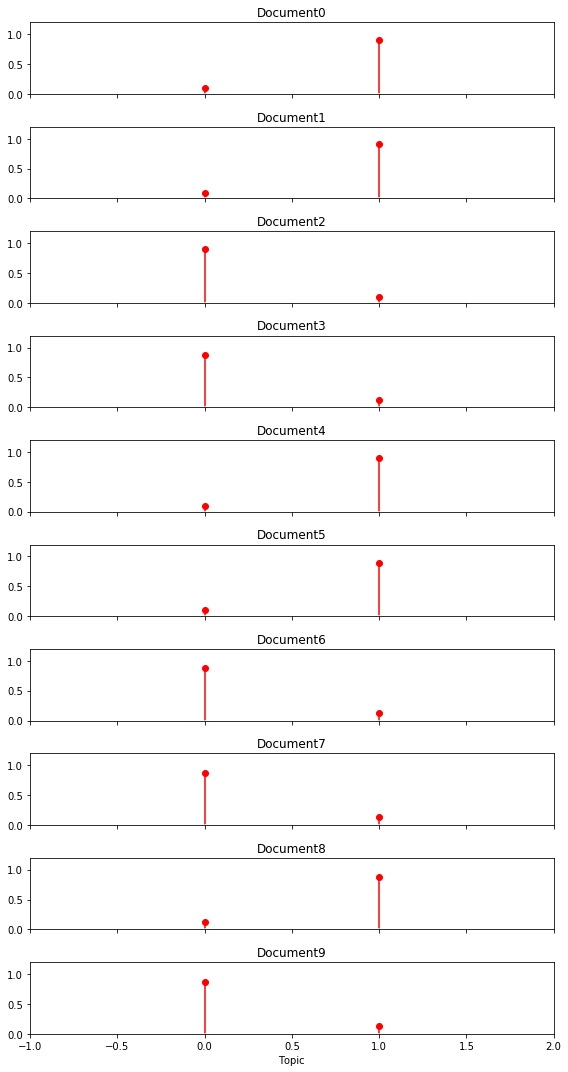

In [69]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(10,1,figsize =(8,15),sharex =True)
for i,k in enumerate(range(0,10)):
    ax[i].stem(docres[k,:],linefmt='r-',markerfmt='ro',basefmt='w-')#stem离散图,plot连续图
    ax[i].set_xlim(-1,2)#x坐标下标
    ax[i].set_ylim(0,1.2)#y坐标下标  
    ax[i].set_title('Prob')
    ax[i].set_title('Document{}'.format(k))
ax[9].set_xlabel('Topic')
plt.tight_layout()
plt.show()

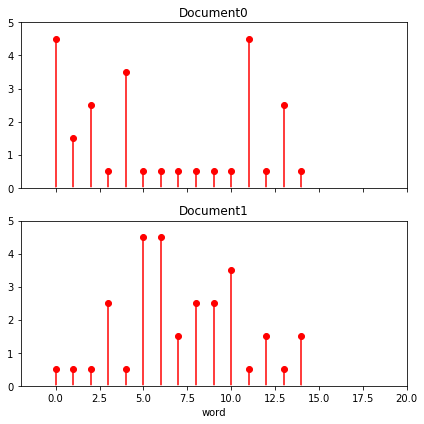

In [72]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(2,1,figsize =(6,6),sharex =True)
for i,k in enumerate(range(0,2)):
    ax[i].stem(lda.components_[k,:],linefmt='r-',markerfmt='ro',basefmt='w-')#stem离散图,plot连续图
    ax[i].set_xlim(-2,20)#x坐标下标
    ax[i].set_ylim(0,5)#y坐标下标  
    ax[i].set_title('Prob')
    ax[i].set_title('Document{}'.format(k))
ax[1].set_xlabel('word')
plt.tight_layout()
plt.show()

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
print(corpus)
vector = TfidfVectorizer()
tfidf = vector.fit_transform(corpus)
print(tfidf.shape)
print(tfidf)

['新春 备 年货 ，新年 联欢晚会', '新春 节目单 ， 春节 联欢晚会 红火', '大盘 下跌 股市 散户', '下跌 股市 赚钱', '金猴 新春 红火 新年', '新车 新年 年货 新春', '股市 反弹 下跌', '股市 散户 赚钱', '新年 , 看 春节 联欢晚会', '大盘 下跌 散户']
(10, 15)
  (0, 6)	0.450929562568
  (0, 3)	0.579725686076
  (0, 5)	0.450929562568
  (0, 10)	0.507191470855
  (1, 6)	0.356735384792
  (1, 10)	0.401244805261
  (1, 12)	0.539503693426
  (1, 8)	0.458627428458
  (1, 9)	0.458627428458
  (2, 2)	0.579725686076
  (2, 0)	0.450929562568
  (2, 11)	0.450929562568
  (2, 4)	0.507191470855
  (3, 0)	0.523221265036
  (3, 11)	0.523221265036
  (3, 13)	0.672665604612
  (4, 6)	0.410305398084
  (4, 5)	0.410305398084
  (4, 9)	0.52749830162
  (4, 14)	0.620519542315
  (5, 6)	0.410305398084
  (5, 3)	0.52749830162
  (5, 5)	0.410305398084
  (5, 7)	0.620519542315
  (6, 0)	0.482964462575
  (6, 11)	0.482964462575
  (6, 1)	0.730404446714
  (7, 11)	0.505209504985
  (7, 4)	0.568243852685
  (7, 13)	0.649509260872
  (8, 5)	0.505209504985
  (8, 10)	0.568243852685
  (8, 8)	0.649509260872
  (9, 2)	0.649509260872
  (9, 0)	0.

In [75]:
word = tf_vectorizer.get_feature_names()
print(word)

['下跌', '反弹', '大盘', '年货', '散户', '新年', '新春', '新车', '春节', '红火', '联欢晚会', '股市', '节目单', '赚钱', '金猴']


In [77]:
print(tfidf.shape)
print(tfidf.toarray())

(10, 15)
[[ 0.          0.          0.          0.57972569  0.          0.45092956
   0.45092956  0.          0.          0.          0.50719147  0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.35673538  0.          0.45862743  0.45862743  0.40124481  0.
   0.53950369  0.          0.        ]
 [ 0.45092956  0.          0.57972569  0.          0.50719147  0.          0.
   0.          0.          0.          0.          0.45092956  0.          0.
   0.        ]
 [ 0.52322127  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.52322127  0.
   0.6726656   0.        ]
 [ 0.          0.          0.          0.          0.          0.4103054
   0.4103054   0.          0.          0.5274983   0.          0.          0.
   0.          0.62051954]
 [ 0.          0.          0.          0.5274983   0.          0.4103054
   0.4103054   0.62051954  0.          0.       

In [78]:
def print_top_words(model, feature_names, n_top_words):
    #打印每个主题下权重较高的term
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    #打印主题-词语分布矩阵
    print (model.components_)

n_top_words=3
tf_feature_names = tf_vectorizer.get_feature_names()
print(tf_feature_names)
print_top_words(lda, tf_feature_names, n_top_words)

['下跌', '反弹', '大盘', '年货', '散户', '新年', '新春', '新车', '春节', '红火', '联欢晚会', '股市', '节目单', '赚钱', '金猴']
Topic #0:
下跌 股市 散户
Topic #1:
新春 新年 联欢晚会
[[ 4.4944452   1.49421043  2.49487998  0.50619141  3.49459811  0.50677646
   0.50595184  0.50608722  0.5066153   0.50562166  0.50648867  4.49444511
   0.50485356  2.49413171  0.50608855]
 [ 0.5055548   0.50578957  0.50512002  2.49380859  0.50540189  4.49322354
   4.49404816  1.49391278  2.4933847   2.49437834  3.49351133  0.50555489
   1.49514644  0.50586829  1.49391145]]


In [79]:
for topic_idx, topic in enumerate(lda.components_):
    print(topic_idx)
    print(topic)

0
[ 4.4944452   1.49421043  2.49487998  0.50619141  3.49459811  0.50677646
  0.50595184  0.50608722  0.5066153   0.50562166  0.50648867  4.49444511
  0.50485356  2.49413171  0.50608855]
1
[ 0.5055548   0.50578957  0.50512002  2.49380859  0.50540189  4.49322354
  4.49404816  1.49391278  2.4933847   2.49437834  3.49351133  0.50555489
  1.49514644  0.50586829  1.49391145]
